# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from textblob import Word
from nltk import word_tokenize,sent_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Web Scrapping

In [2]:
x = 2;
link = "https://www.trustpilot.com/review/malaysiaairlines.com"
page="?page="
req = requests.get(link)
currentPage = req.url
print(currentPage)
url = link 
print(url)

reviewStar = []
reviewContent = []
reviewTitle = []

while (True):
    url = link + page + str(x)
    htmlText = req.text
    splitList = htmlText.split("review-title")
    del(splitList[0])

    
    listRange = len(splitList)
    for i in range(listRange):
        afterFirstSplit = splitList[i].split('">')[1]
        afterSecondSplit = afterFirstSplit.split('</a>')[0]
        i += 1
        reviewTitle.append(afterSecondSplit)
    
    splitList = htmlText.split("review-content__text")
    del(splitList[0])
    
    listRange = len(splitList)
    for i in range(listRange):
        afterFirstSplit = splitList[i].split('>\n            ')[1]
        afterSecondSplit = afterFirstSplit.split('\n        </p>')[0]
        i += 1
        reviewContent.append(afterSecondSplit)

    splitList = htmlText.split("star-rating star-rating--medium")
    del(splitList[0])
    
    listRange = len(splitList)
    for i in range(listRange):
        afterFirstSplit = splitList[i].split('stars/stars-')[1]
        afterSecondSplit = afterFirstSplit.split('.svg')[0]
        i += 1
        reviewStar.append(afterSecondSplit)
    
    print(url)
    x+=1
    req = requests.get(url)
    currentPage = req.url
    print(currentPage)
    print(currentPage != link)
    if (currentPage == link):
        break
    
dataset = pd.DataFrame({'Rating': reviewStar, 'Title': reviewTitle, 'Comment': reviewContent})
dataset.to_csv(r'C:\Users\.........\mas.csv', index = None, header=True)
dataset


https://www.trustpilot.com/review/malaysiaairlines.com
https://www.trustpilot.com/review/malaysiaairlines.com
https://www.trustpilot.com/review/malaysiaairlines.com?page=2
https://www.trustpilot.com/review/malaysiaairlines.com?page=2
True
https://www.trustpilot.com/review/malaysiaairlines.com?page=3
https://www.trustpilot.com/review/malaysiaairlines.com?page=3
True
https://www.trustpilot.com/review/malaysiaairlines.com?page=4
https://www.trustpilot.com/review/malaysiaairlines.com
False


,Rating,Title,Comment
0,1,Awful customer service,Awful customer service. Never will I book with...
1,1,Poor Service. 14 days later and my ticket stil...,It has been a frustrating 2 weeks dealing with...
2,3,Not getting back my money for refund&#8230;,Not getting back my money for refund after my ...
3,1,Probably one of the worst companies out&#8230;,Probably one of the worst companies out there....
4,2,I really wanted to give 5 stars but it all fel...,I really wanted to give 5 stars and was geared...
5,1,Terrible experience,"Hi There,<br /><br />I would like to send this..."
6,1,Terrible website and service,"Terrible website, a disgrace for an airline. W..."
7,1,Never again,It is more than 1 week that I send email to th...
8,1,The world&#39;s worst airline,The world&#39;s worst airline. If them managin...
9,5,Have to say the service on this flight&#8230;,Have to say the service on this flight had to ...


In [3]:
dataset.shape

(45, 3)

# Cleaning Comment and Title Columns

In [4]:
#removing <br />
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('<br />',' '))
#Replacing  &#39; to '
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&#39;',"'"))
#Replacing  &amp; to &
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&amp;',"&"))
#Replacing &quot; to & "
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&quot;','"'))
dataset['Comment'][4]

'I really wanted to give 5 stars and was geared up to this right up until we arrived at Heathrow and found my luggage had not been loaded on the plane when we were in transit in Kuala Lumpur.  Our actual flights were faultless. The cabin staff were the most smiley, friendly and helpful we have experienced and the food was plentiful and good. Unfortunately a company\'s reputation is only as good as the weakest link in its operation and in this case its ability to actually put the luggage on the flight and the subcontractor in Heathrow who deals with three passengers who had the same problem. In Heathrow one member of staff treated us with disinterest and said she had dealt with more than her fair share of customers and was not serving any more, leaving the painfully slow queue to the one remaining staff member who, she said, "should speed up his work".'

In [5]:
#removing &#8230;
dataset['Title'] = dataset['Title'].map(lambda x: x.replace('&#8230;',''))
#Replacing  &#39; to '
dataset['Title'] = dataset['Title'].map(lambda x: x.replace('&#39;',"'"))
dataset['Title'][0]

'Awful customer service'

## Text Preprocessing

In [6]:
#tranform into lower cases (Comment)
dataset['Comment'] = dataset['Comment'].apply(lambda x: x.lower())
dataset['Comment'].head(10)

0    awful customer service. never will i book with...
1    it has been a frustrating 2 weeks dealing with...
2    not getting back my money for refund after my ...
3    probably one of the worst companies out there....
4    i really wanted to give 5 stars and was geared...
5    hi there,  i would like to send this complaint...
6    terrible website, a disgrace for an airline. w...
7    it is more than 1 week that i send email to th...
8    the world's worst airline. if them managing to...
9    have to say the service on this flight had to ...
Name: Comment, dtype: object

In [7]:
#tranform into lower cases (Title)
dataset['Title'] = dataset['Title'].apply(lambda x: x.lower())
dataset['Title'].head(10)

0                               awful customer service
1    poor service. 14 days later and my ticket stil...
2                 not getting back my money for refund
3              probably one of the worst companies out
4    i really wanted to give 5 stars but it all fel...
5                                  terrible experience
6                         terrible website and service
7                                          never again
8                            the world's worst airline
9               have to say the service on this flight
Name: Title, dtype: object

In [8]:
#removing punctuation marks (Comment)
dataset['Comment'] = dataset['Comment'].str.replace("[^\w\s\s]"," ")
dataset['Comment'].head()

0    awful customer service  never will i book with...
1    it has been a frustrating 2 weeks dealing with...
2    not getting back my money for refund after my ...
3    probably one of the worst companies out there ...
4    i really wanted to give 5 stars and was geared...
Name: Comment, dtype: object

In [9]:
#removing punctuation marks (Title)
dataset['Title'] = dataset['Title'].str.replace("[^\w\s\s]"," ")
dataset['Title'].head()

0                               awful customer service
1    poor service  14 days later and my ticket stil...
2                 not getting back my money for refund
3              probably one of the worst companies out
4    i really wanted to give 5 stars but it all fel...
Name: Title, dtype: object

In [10]:
#Comment
dataset['Comment'].tail()

40    in their latest fb post malaysia airlines goes...
41    we booked tickets from phuket to kuala lumpur ...
42    despite all their troubles   woes i really fee...
43    bought 4 tickets  one of us unable to travel  ...
44    5 months ago i bought tickets from london to k...
Name: Comment, dtype: object

In [11]:
#  Title
dataset['Title'].tail()

40                     absolutely no compassion 
41    it s a scam   worst customer service ever 
42       all round pretty good and above average
43               fraudulent  unpleasant and rude
44                        impossible call center
Name: Title, dtype: object

In [12]:
#replace numbers with space
dataset['Comment'] = dataset['Comment'].str.replace('\d+', '')
dataset['Comment'].head()

0    awful customer service  never will i book with...
1    it has been a frustrating  weeks dealing with ...
2    not getting back my money for refund after my ...
3    probably one of the worst companies out there ...
4    i really wanted to give  stars and was geared ...
Name: Comment, dtype: object

In [13]:
#replace numbers with space
dataset['Title'] = dataset['Title'].str.replace('\d+', '')
dataset['Title'].head()

0                               awful customer service
1    poor service   days later and my ticket still ...
2                 not getting back my money for refund
3              probably one of the worst companies out
4    i really wanted to give  stars but it all fell...
Name: Title, dtype: object

In [14]:
#remove stop words(Comment)
from nltk.corpus import stopwords 
stop = set(stopwords.words('english')) 

dataset['Comment'] = dataset['Comment'].apply(lambda x: " ".join(x for x in x.split()
                                                                if x not in stop))
dataset['Comment'].head()

0    awful customer service never book phone number...
1    frustrating weeks dealing malaysian airlines p...
2    getting back money refund flight got delayed n...
3    probably one worst companies flight got delaye...
4    really wanted give stars geared right arrived ...
Name: Comment, dtype: object

In [15]:
#remove stop words (Title)
dataset['Title'] = dataset['Title'].apply(lambda x: " ".join(x for x in x.split()
                                                                if x not in stop))
dataset['Title'].head()

0                               awful customer service
1         poor service days later ticket still changed
2                            getting back money refund
3                         probably one worst companies
4    really wanted give stars fell apart reached he...
Name: Title, dtype: object

## Lemmatization

In [16]:
dataset['Comment'] = dataset['Comment'].apply(lambda x: " ".join([Word(myword).lemmatize()
                                                                 for myword in x.split()]))
dataset['Comment'].head(20)

0     awful customer service never book phone number...
1     frustrating week dealing malaysian airline pho...
2     getting back money refund flight got delayed n...
3     probably one worst company flight got delayed ...
4     really wanted give star geared right arrived h...
5     hi would like send complaint customer service ...
6     terrible website disgrace airline website work...
7     week send email global customer support cancel...
8     world worst airline managing lose airplane whi...
9     say service flight best encountered even thoug...
10    hope guy hear customer better service like air...
11    pleasant experience mh flight far although cab...
12    trip malaysian airline mh started really bad b...
13    terrible experience booked advance come home f...
14    booked malaysia airline codeshare flight via e...
15    board tried booked website online internet spe...
16    flew year ago found good booked one way flight...
17    took flight qr pm flight delayed reached p

In [17]:
dataset['Title'] = dataset['Title'].apply(lambda x: " ".join([Word(myword).lemmatize()
                                                                 for myword in x.split()]))
dataset['Title'].head(20)

0                                awful customer service
1           poor service day later ticket still changed
2                             getting back money refund
3                            probably one worst company
4     really wanted give star fell apart reached hea...
5                                   terrible experience
6                              terrible website service
7                                                 never
8                                   world worst airline
9                                    say service flight
10                               hope guy hear customer
11                    pleasant experience mh flight far
12                            trip malaysian airline mh
13                                  terrible experience
14                    booked malaysia airline codeshare
15                                  poor online support
16                                  flew year ago found
17                                    took fligh

## Tokenization

In [18]:
#Tokenize the sentences into word (Comment)

dataset['Comment'].apply(lambda x: word_tokenize(x))

0     [awful, customer, service, never, book, phone,...
1     [frustrating, week, dealing, malaysian, airlin...
2     [getting, back, money, refund, flight, got, de...
3     [probably, one, worst, company, flight, got, d...
4     [really, wanted, give, star, geared, right, ar...
5     [hi, would, like, send, complaint, customer, s...
6     [terrible, website, disgrace, airline, website...
7     [week, send, email, global, customer, support,...
8     [world, worst, airline, managing, lose, airpla...
9     [say, service, flight, best, encountered, even...
10    [hope, guy, hear, customer, better, service, l...
11    [pleasant, experience, mh, flight, far, althou...
12    [trip, malaysian, airline, mh, started, really...
13    [terrible, experience, booked, advance, come, ...
14    [booked, malaysia, airline, codeshare, flight,...
15    [board, tried, booked, website, online, intern...
16    [flew, year, ago, found, good, booked, one, wa...
17    [took, flight, qr, pm, flight, delayed, re

In [19]:
#Tokenize the sentences into word (Title)
dataset['Title'].apply(lambda x: word_tokenize(x))

0                            [awful, customer, service]
1     [poor, service, day, later, ticket, still, cha...
2                        [getting, back, money, refund]
3                       [probably, one, worst, company]
4     [really, wanted, give, star, fell, apart, reac...
5                                [terrible, experience]
6                          [terrible, website, service]
7                                               [never]
8                               [world, worst, airline]
9                                [say, service, flight]
10                          [hope, guy, hear, customer]
11              [pleasant, experience, mh, flight, far]
12                       [trip, malaysian, airline, mh]
13                               [terrible, experience]
14               [booked, malaysia, airline, codeshare]
15                              [poor, online, support]
16                             [flew, year, ago, found]
17                               [took, flight, 

# Data Exploration

## Word Cloud

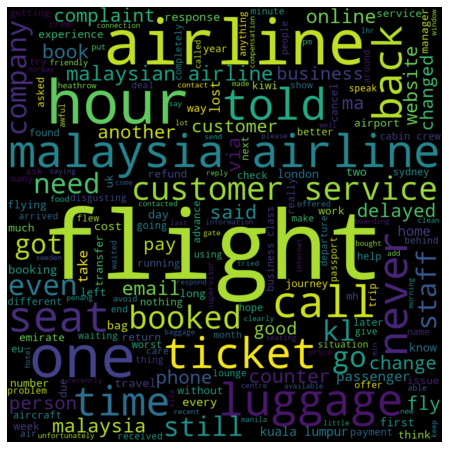

In [20]:
test =  dataset['Comment']
s = ' '
text = s.join(test)

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='black', 
                min_font_size = 11).generate(text)
# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

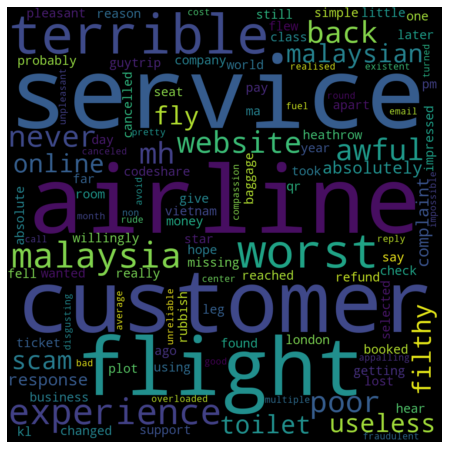

In [21]:
test_1 =  dataset['Title']
s = ' '
text_1 = s.join(test_1)

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='black', 
                min_font_size = 11).generate(text_1)
# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Frequency of Top20

In [22]:
# Most frequent words in short description (Comment)
comment_most_freq_words = pd.Series(" ".join(dataset['Comment']).split()).value_counts()
comment_most_freq_words.head(20)

flight      89
airline     65
malaysia    36
customer    27
hour        26
u           26
one         25
service     25
luggage     24
call        23
told        23
ticket      22
seat        22
never       21
time        20
back        19
even        18
booked      17
get         15
business    15
dtype: int64

In [23]:
# Most frequent words in short description (Title)
title_most_freq_words = pd.Series(" ".join(dataset['Title']).split()).value_counts()
title_most_freq_words.head(20)

service       8
airline       7
customer      6
flight        5
terrible      4
worst         3
malaysia      3
experience    3
absolutely    2
response      2
online        2
scam          2
toilet        2
filthy        2
complaint     2
poor          2
never         2
awful         2
malaysian     2
mh            2
dtype: int64

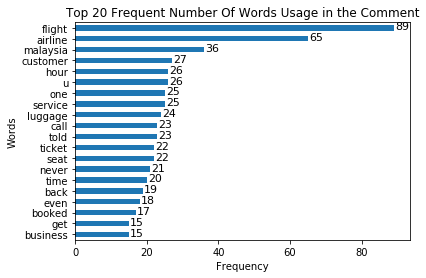

In [24]:
# comment plot
comment_freq_plot = comment_most_freq_words.head(20).sort_values(ascending = True).plot(kind="barh",
                                                                                        title = "Top 20 Frequent Number Of Words Usage in the Comment")

plt.style.use("ggplot")
comment_freq_plot.set_xlabel("Frequency")
comment_freq_plot.set_ylabel("Words")

totals = []
for i in comment_freq_plot.patches:
    totals.append(i.get_width())

for i in comment_freq_plot.patches:
    comment_freq_plot.text(i.get_width()+.3,i.get_y()+0.1,str(i.get_width()),
                           fontsize = 11,color= 'black')

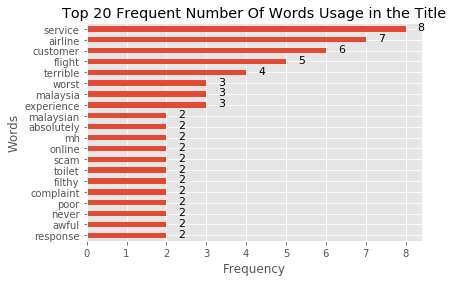

In [25]:
# title plot
title_freq_plot = title_most_freq_words.head(20).sort_values(ascending = True).plot(kind="barh",
                                                                                        title = "Top 20 Frequent Number Of Words Usage in the Title")

plt.style.use("ggplot")
title_freq_plot.set_xlabel("Frequency")
title_freq_plot.set_ylabel("Words")

totals = []
for i in title_freq_plot.patches:
    totals.append(i.get_width())

for i in title_freq_plot.patches:
    title_freq_plot.text(i.get_width()+.3,i.get_y()+0.1,str(i.get_width()),
                           fontsize = 11,color= 'black')

# Ratings

In [26]:
dataset['Length'] = dataset["Comment"].apply(lambda x: len(x) - x.count(" "))
dataset.head()

,Rating,Title,Comment,Length
0,1,awful customer service,awful customer service never book phone number...,367
1,1,poor service day later ticket still changed,frustrating week dealing malaysian airline pho...,483
2,3,getting back money refund,getting back money refund flight got delayed n...,75
3,1,probably one worst company,probably one worst company flight got delayed ...,220
4,2,really wanted give star fell apart reached hea...,really wanted give star geared right arrived h...,437


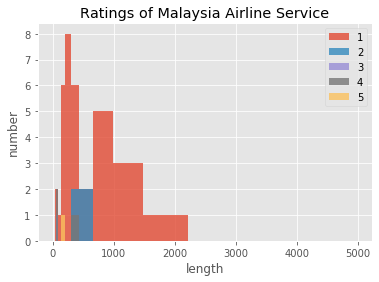

In [27]:
bins = 1.5**(np.arange(0,22))
plt.hist(dataset[dataset['Rating']=='1']['Length'], bins=bins,alpha=0.8)
plt.hist(dataset[dataset['Rating']=='2']['Length'], bins=bins,alpha=0.8)
plt.hist(dataset[dataset['Rating']=='3']['Length'], bins=bins,alpha=0.8)
plt.hist(dataset[dataset['Rating']=='4']['Length'], bins=bins,alpha=0.8)
plt.hist(dataset[dataset['Rating']=='5']['Length'], bins=bins,alpha=0.8)
plt.legend(('1','2','3','4','5'))
plt.title("Ratings of Malaysia Airline Service")
plt.xlabel("length")
plt.ylabel("number")
plt.show()

## Using Bi-Grams

In [28]:
#comment
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(dataset['Comment'])
frequencies = sum(sparse_matrix).toarray()[0]
bi_grams_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [29]:
#title
word_vectorizer1 = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer1.fit_transform(dataset['Title'])
frequencies1 = sum(sparse_matrix).toarray()[0]
bi_grams_df1 = pd.DataFrame(frequencies1, index=word_vectorizer1.get_feature_names(), columns=['frequency'])

In [30]:
bi_grams_df.sort_values(by = "frequency",ascending=False).head(20)


,frequency
malaysia airline,25
customer service,18
malaysian airline,12
kuala lumpur,9
business class,6
cabin crew,6
flight delayed,5
call back,4
even though,4
never fly,4


In [31]:
bi_grams_df1.sort_values(by = "frequency",ascending=False).head(20)

,frequency
customer service,5
filthy toilet,2
malaysian airline,2
malaysia airline,2
awful customer,2
terrible experience,2
reached heathrow,1
service bad,1
selected seat,1
scam worst,1


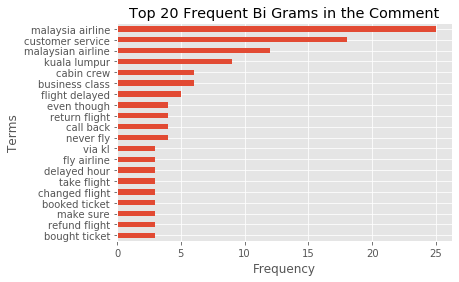

In [32]:
plt.style.use("ggplot")
plt.xlabel("Frequency",)
plt.ylabel("Terms")
top20_bigrams = bi_grams_df["frequency"].sort_values(ascending = False).head(20)

top20_bigrams.head(20).sort_values(ascending = True).plot(kind="barh",
                                                          title = "Top 20 Frequent Bi Grams in the Comment")

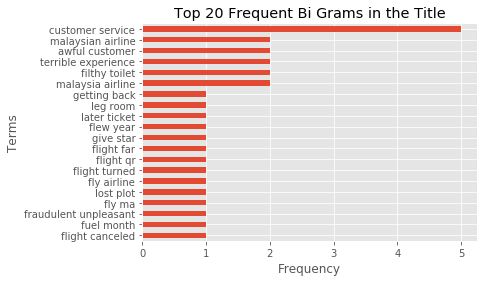

In [33]:
plt.style.use("ggplot")
plt.xlabel("Frequency",)
plt.ylabel("Terms")
top20_title_bigrams = bi_grams_df1["frequency"].sort_values(ascending = False).head(20)

top20_title_bigrams.head(20).sort_values(ascending = True).plot(kind="barh",
                                                          title = "Top 20 Frequent Bi Grams in the Title")

# Sentiment Analysis

In [34]:
sia = SentimentIntensityAnalyzer()
dataset['Scores'] = dataset['Comment'].apply(lambda Comment: sia.polarity_scores(Comment)) 
dataset.head()

,Rating,Title,Comment,Length,Scores
0,1,awful customer service,awful customer service never book phone number...,367,"{'neg': 0.274, 'neu': 0.596, 'pos': 0.13, 'com..."
1,1,poor service day later ticket still changed,frustrating week dealing malaysian airline pho...,483,"{'neg': 0.065, 'neu': 0.89, 'pos': 0.045, 'com..."
2,3,getting back money refund,getting back money refund flight got delayed n...,75,"{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp..."
3,1,probably one worst company,probably one worst company flight got delayed ...,220,"{'neg': 0.297, 'neu': 0.594, 'pos': 0.109, 'co..."
4,2,really wanted give star fell apart reached hea...,really wanted give star geared right arrived h...,437,"{'neg': 0.128, 'neu': 0.608, 'pos': 0.264, 'co..."


In [35]:
dataset['Compound'] = dataset['Scores'].apply(lambda d:d['compound'])
dataset.head()

,Rating,Title,Comment,Length,Scores,Compound
0,1,awful customer service,awful customer service never book phone number...,367,"{'neg': 0.274, 'neu': 0.596, 'pos': 0.13, 'com...",-0.8620
1,1,poor service day later ticket still changed,frustrating week dealing malaysian airline pho...,483,"{'neg': 0.065, 'neu': 0.89, 'pos': 0.045, 'com...",-0.2500
2,3,getting back money refund,getting back money refund flight got delayed n...,75,"{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...",-0.2263
3,1,probably one worst company,probably one worst company flight got delayed ...,220,"{'neg': 0.297, 'neu': 0.594, 'pos': 0.109, 'co...",-0.8442
4,2,really wanted give star fell apart reached hea...,really wanted give star geared right arrived h...,437,"{'neg': 0.128, 'neu': 0.608, 'pos': 0.264, 'co...",0.8885


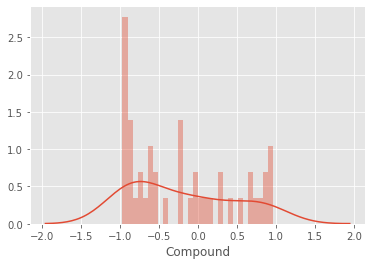

In [36]:
#Sentiment Polarity Distribution

import seaborn as sns
sns.distplot(dataset['Compound'],bins=30);

In [37]:
dataset['Sentiment_Score'] = dataset['Compound'].apply(lambda score:"positive" if score >= 0.2 
                                                       else ("negative" if score <= -0.2 else "neutral"))
dataset.head()

,Rating,Title,Comment,Length,Scores,Compound,Sentiment_Score
0,1,awful customer service,awful customer service never book phone number...,367,"{'neg': 0.274, 'neu': 0.596, 'pos': 0.13, 'com...",-0.8620,negative
1,1,poor service day later ticket still changed,frustrating week dealing malaysian airline pho...,483,"{'neg': 0.065, 'neu': 0.89, 'pos': 0.045, 'com...",-0.2500,negative
2,3,getting back money refund,getting back money refund flight got delayed n...,75,"{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...",-0.2263,negative
3,1,probably one worst company,probably one worst company flight got delayed ...,220,"{'neg': 0.297, 'neu': 0.594, 'pos': 0.109, 'co...",-0.8442,negative
4,2,really wanted give star fell apart reached hea...,really wanted give star geared right arrived h...,437,"{'neg': 0.128, 'neu': 0.608, 'pos': 0.264, 'co...",0.8885,positive


In [38]:
dataset['Rating'] = dataset['Rating'].astype(int)
dataset ['Rating_to_Sentiment'] = dataset['Rating'].apply(lambda rate:"positive" if rate >= 4 
                                                          else ("negative" if rate <= 2 else "neutral"))
dataset.head()

,Rating,Title,Comment,Length,Scores,Compound,Sentiment_Score,Rating_to_Sentiment
0,1,awful customer service,awful customer service never book phone number...,367,"{'neg': 0.274, 'neu': 0.596, 'pos': 0.13, 'com...",-0.8620,negative,negative
1,1,poor service day later ticket still changed,frustrating week dealing malaysian airline pho...,483,"{'neg': 0.065, 'neu': 0.89, 'pos': 0.045, 'com...",-0.2500,negative,negative
2,3,getting back money refund,getting back money refund flight got delayed n...,75,"{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...",-0.2263,negative,neutral
3,1,probably one worst company,probably one worst company flight got delayed ...,220,"{'neg': 0.297, 'neu': 0.594, 'pos': 0.109, 'co...",-0.8442,negative,negative
4,2,really wanted give star fell apart reached hea...,really wanted give star geared right arrived h...,437,"{'neg': 0.128, 'neu': 0.608, 'pos': 0.264, 'co...",0.8885,positive,negative


In [39]:
dataset['Rating_to_Sentiment'].value_counts()

negative    40
positive     4
neutral      1
Name: Rating_to_Sentiment, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

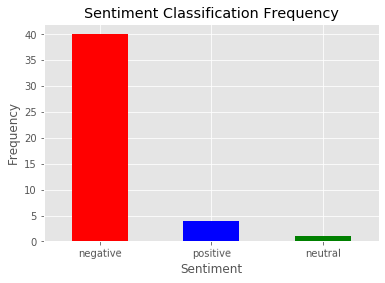

In [40]:
dataset['Rating_to_Sentiment'].value_counts().plot(kind = "bar",color = ["red","blue","green"])
plt.title("Sentiment Classification Frequency")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.xticks(rotation = "0.5")

In [41]:
print(accuracy_score(dataset['Sentiment_Score'],dataset['Rating_to_Sentiment']))
print(confusion_matrix(dataset['Sentiment_Score'],dataset['Rating_to_Sentiment']))

0.6444444444444445
[[25  1  0]
 [ 6  0  0]
 [ 9  0  4]]


In [42]:
print(classification_report(dataset['Sentiment_Score'],dataset['Rating_to_Sentiment']))

              precision    recall  f1-score   support

    negative       0.62      0.96      0.76        26
     neutral       0.00      0.00      0.00         6
    positive       1.00      0.31      0.47        13

    accuracy                           0.64        45
   macro avg       0.54      0.42      0.41        45
weighted avg       0.65      0.64      0.57        45



In [43]:
dataset.to_csv(r'C:\Users\amyna\Desktop\CDS511 Lab\project\mas_sentiment.csv', index = None, header=True)

## Latent Dirichlet Allocation (LDA) - Topic bag of words
### Preparation data for Extracting the Topics

In [44]:
# Discard the words that showed up  in 90% of comments
# at least show in 2 comments and remove stop words
cv = CountVectorizer(max_df=0.9, min_df=2,stop_words='english')

dtm = cv.fit_transform(dataset['Comment'])
dtm

<45x353 sparse matrix of type '<class 'numpy.int64'>'
	with 1347 stored elements in Compressed Sparse Row format>

In [45]:
LDA = LatentDirichletAllocation(n_components=10) 
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [46]:
print(len(cv.get_feature_names()))
print(type(cv.get_feature_names()))

353
<class 'list'>


In [47]:
#grab a vocabulary of words
cv.get_feature_names()[177]

'klia'

In [48]:
#grab the topic
print(LDA.components_)

[[1.10000249 0.1        0.1        ... 0.1        1.1000004  0.1       ]
 [1.10000227 0.1        0.1        ... 0.1        0.1        0.1       ]
 [0.1        0.1        0.1        ... 1.09999393 0.1        0.1       ]
 ...
 [0.1        1.09999987 0.1        ... 0.1        0.1        0.1       ]
 [0.1        0.1        0.1        ... 0.1        0.1        0.1       ]
 [1.09999442 2.10000013 1.10000244 ... 0.1        1.0999996  3.1       ]]


In [49]:
single_topic = LDA.components_[0]
single_topic.argsort()

array([332,  99, 352, 221, 346,  46, 313, 179, 145,  48,  73, 327, 154,
       301, 182, 177, 285, 248, 224, 325, 114, 298,  10, 206, 299,  32,
       112,  89, 247, 303, 102, 340,  18, 162, 319, 345,  96, 239, 198,
       152, 133, 214, 230, 120,   1, 222, 294,  95,  60,  62, 324, 174,
       292,  15, 256,  79,  56, 118, 231, 266, 235, 269,  75,  80, 251,
       168,  33, 242, 194, 155,  34, 321, 284, 209, 137,  71, 132, 161,
       257, 282, 268, 138, 225,  14, 246,  55,  72, 178, 128, 233, 173,
       108, 263, 104,   5, 124,  83, 167, 169,  19,  61, 100,  50, 287,
       279, 149, 110, 216, 142, 122,  90, 254, 187,   8, 103, 113,  53,
       289, 181, 207, 163, 275, 191, 320,   6, 236, 147,  38, 307, 337,
       349, 146, 260,  22, 326, 290, 286,  17, 197, 328, 164, 220, 101,
       330, 342, 204, 300,  43, 175, 244, 350, 288, 314, 258, 183,  29,
       109,   4, 151, 172, 253, 226,  59, 232, 213, 335,  16,  88,  74,
       297, 317,  78,  39, 171,  42, 262,  41, 243,  51, 277,  9

In [50]:
#Argsort index positions sorted
# top 10
single_topic.argsort()[-10:]

array([ 36, 159,  85, 318, 139, 144,  27, 127,  67, 315], dtype=int64)

In [51]:
top_ten =  single_topic.argsort()[-10:]
j = 1
for index in top_ten:
    print(j,"- ",cv.get_feature_names()[index])
    j+=1

1 -  booked
2 -  hotel
3 -  customer
4 -  transfer
5 -  getting
6 -  got
7 -  bag
8 -  flight
9 -  company
10 -  told


### Extract the Top 20 Positive Topics

In [52]:
# store the data with positive and negative feeling inside the positive and negative variable
positive = dataset[dataset['Sentiment_Score']=='positive']
negative = dataset[dataset['Sentiment_Score']=='negative']
positive.head()

,Rating,Title,Comment,Length,Scores,Compound,Sentiment_Score,Rating_to_Sentiment
4,2,really wanted give star fell apart reached hea...,really wanted give star geared right arrived h...,437,"{'neg': 0.128, 'neu': 0.608, 'pos': 0.264, 'co...",0.8885,positive,negative
7,1,never,week send email global customer support cancel...,427,"{'neg': 0.098, 'neu': 0.631, 'pos': 0.271, 'co...",0.9310,positive,negative
9,5,say service flight,say service flight best encountered even thoug...,180,"{'neg': 0.051, 'neu': 0.624, 'pos': 0.326, 'co...",0.9169,positive,positive
10,4,hope guy hear customer,hope guy hear customer better service like air...,58,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...",0.8807,positive,positive
11,4,pleasant experience mh flight far,pleasant experience mh flight far although cab...,77,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp...",0.7579,positive,positive


In [69]:
cv = CountVectorizer(max_df=0.9, min_df=2,stop_words='english')
dtmPos = cv.fit_transform(positive['Comment'])
LDA = LatentDirichletAllocation(n_components=10) 
LDA.fit(dtmPos)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [72]:
single_topic = LDA.components_[0]
single_topic.argsort()
single_topic.argsort()[-20:]

array([32, 23,  8, 29, 75, 14, 26, 18, 30, 10, 73, 70, 38, 74, 31,  9,  1,
       42,  6, 76], dtype=int64)

In [73]:
#show the highest probility word per topic
top_ten =  single_topic.argsort()[-20:]
j = 1
for index in top_ten:
    print(j,"- ",cv.get_feature_names()[index])
    j+=1

1 -  guy
2 -  experience
3 -  cabin
4 -  friendly
5 -  website
6 -  company
7 -  flight
8 -  cost
9 -  good
10 -  cancel
11 -  want
12 -  ticket
13 -  kg
14 -  way
15 -  got
16 -  called
17 -  ago
18 -  london
19 -  booked
20 -  year


In [74]:
for index, topic in enumerate (LDA.components_):
    print(f"The top 10 topic #{i}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-10:]])
    print('\n')
    print('\n')

The top 10 topic #Rectangle(xy=(0, 18.75), width=8, height=0.5, angle=0)
['want', 'ticket', 'kg', 'way', 'got', 'called', 'ago', 'london', 'booked', 'year']




The top 10 topic #Rectangle(xy=(0, 18.75), width=8, height=0.5, angle=0)
['ended', 'booking', 'hour', 'make', 'far', 'hope', 'flying', 'friendly', 'online', 'cost']




The top 10 topic #Rectangle(xy=(0, 18.75), width=8, height=0.5, angle=0)
['lounge', 'tried', 'online', 'guy', 'experience', 'cabin', 'friendly', 'website', 'company', 'year']




The top 10 topic #Rectangle(xy=(0, 18.75), width=8, height=0.5, angle=0)
['lounge', 'tried', 'online', 'guy', 'experience', 'cabin', 'friendly', 'website', 'company', 'year']




The top 10 topic #Rectangle(xy=(0, 18.75), width=8, height=0.5, angle=0)
['service', 'better', 'lot', 'airline', 'food', 'customer', 'ma', 'like', 'email', 'flight']




The top 10 topic #Rectangle(xy=(0, 18.75), width=8, height=0.5, angle=0)
['contacted', 'booked', 'hour', 'changed', 'speak', 'change', 'ticket

### Extract the Top 20 Negative Topics

In [76]:
cv = CountVectorizer(max_df=0.9, min_df=2,stop_words='english')
dtmNeg = cv.fit_transform(negative['Comment'])
LDA = LatentDirichletAllocation(n_components=10) 
LDA.fit(dtmNeg)
single_topic = LDA.components_[0]
#return the index position that is sorted from least to greatest (sort from lowest to highest value)
single_topic.argsort()
# the highest ones are the at the end of array (Top 20 Value)
single_topic.argsort()[-20:]
top_ten =  single_topic.argsort()[-20:]
j = 1
for index in top_ten:
    print(j,"- ",cv.get_feature_names()[index])
    j+=1

1 -  connecting
2 -  waited
3 -  kl
4 -  day
5 -  flew
6 -  gate
7 -  lost
8 -  check
9 -  week
10 -  money
11 -  hour
12 -  flight
13 -  respond
14 -  planned
15 -  cost
16 -  awful
17 -  luggage
18 -  service
19 -  airline
20 -  customer


In [77]:
for index, topic in enumerate (LDA.components_):
    print(f"The top 10 topic #{i}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-10:]])
    print('\n')
    print('\n')

The top 10 topic #Rectangle(xy=(0, 18.75), width=8, height=0.5, angle=0)
['hour', 'flight', 'respond', 'planned', 'cost', 'awful', 'luggage', 'service', 'airline', 'customer']




The top 10 topic #Rectangle(xy=(0, 18.75), width=8, height=0.5, angle=0)
['hope', 'joke', 'work', 'book', 'pay', 'phone', 'flight', 'scam', 'service', 'website']




The top 10 topic #Rectangle(xy=(0, 18.75), width=8, height=0.5, angle=0)
['luggage', 'boarding', 'counter', 'know', 'need', 'kl', 'delayed', 'hour', 'airline', 'flight']




The top 10 topic #Rectangle(xy=(0, 18.75), width=8, height=0.5, angle=0)
['kl', 'avoid', 'airline', 'customer', 'use', 'getting', 'week', 'phone', 'price', 'money']




The top 10 topic #Rectangle(xy=(0, 18.75), width=8, height=0.5, angle=0)
['aircraft', 'malaysia', 'business', 'service', 'malaysian', 'customer', 'luggage', 'seat', 'airline', 'flight']




The top 10 topic #Rectangle(xy=(0, 18.75), width=8, height=0.5, angle=0)
['waiting', 'week', 'worst', 'avoid', 'phone', '